<a href="https://colab.research.google.com/github/20hnu/ml_projects/blob/main/cats_vs_dogs_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:05<00:00, 224MB/s]
100% 1.06G/1.06G [00:05<00:00, 224MB/s]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256),
)
validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding="valid"))

model.add(Conv2D(64,kernel_size = (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding="valid"))

model.add(Conv2D(128,kernel_size = (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))
model.add(Dropout(0.1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer = 'adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 104ms/step - loss: 7.5862 - accuracy: 0.5023 - val_loss: 7.6166 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 7.6225 - accuracy: 0.5007 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 7.5427 - accuracy: 0.5059 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 7.6565 - accuracy: 0.4985 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 7.6426 - accuracy: 0.4994 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 7.6603 - accuracy: 0.4983 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 7.5835 - accuracy: 0.5033 - val_loss: 7.6246 - val_ac

In [ ]:
history


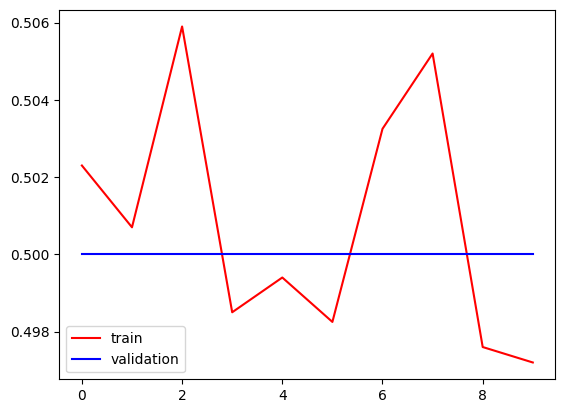

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color = "red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

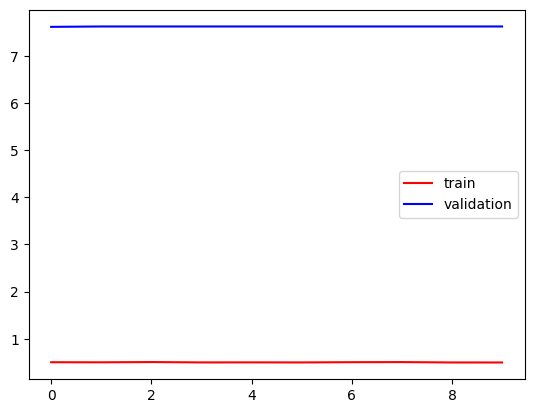

In [ ]:
plt.plot(history.history["accuracy"],color = "red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/OIP.jpg')

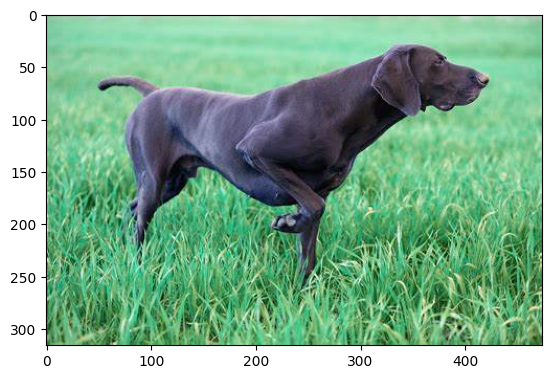

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(316, 474, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 65,  74,  87],
        [ 78,  88,  98],
        [ 63,  75,  85],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 84,  92, 101],
        [ 67,  79,  91],
        [ 70,  84,  97],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 85,  93, 106],
        [ 68,  80,  90],
        [ 83,  94, 104],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
test_input = test_img.reshape((1,256,256,3))

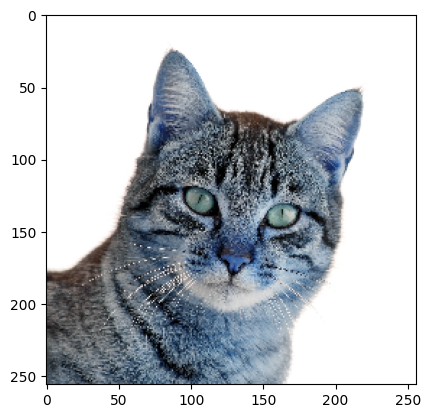

In [ ]:
plt.imshow(test_img)

In [ ]:
type(model.predict(test_input))

1/1 [==============================] - 0s 19ms/step


numpy.ndarray

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)